# Credit Risk Scoring

## Business Understanding

Nowadays one can invest in other people's loans using online peer-to-peer lending platforms such as, for example, Lending Club. In the Lending Club, borrowers with higher credit scores (more trustworthy and less risky) earn lower interest rates on their loans while borrowers with lower credit scores (less trustworthy and riskier) earn higher rates. From an investor's point of view, loans with higher interest rates are more attractive because they provide a higher rate of return on investment (ROI) but on the other hand, carry the risk of not being returned at all (default). Therefore, a machine learning model that can predict which high-interest loans are more likely to be repaid, will provide added value by minimizing the associated risks.

## Analytic Approach

For this project I will be using the libraries for data manipulation (Pandas, Numpy), data visualization (Matplotlib, Seaborn), machine learning (Scikit-learn, XGBoost) and some statistics to get some insight and the trend of the data.

## Data Understanding

In [1]:
# Import library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
#import hvplot.pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Import kaggle API token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danafatadillarabba","key":"33622d88bd478d521af60beb2318cd37"}'}

In [3]:
#Import dataset

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

#!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d devanshi23/loan-data-2007-2014 -p /content

!unzip /content/loan-data-2007-2014.zip -d /content/

-rw-r--r-- 1 root root 74 Mar 20 15:31 kaggle.json
/content
 91% 54.0M/59.5M [00:00<00:00, 105MB/s] 
100% 59.5M/59.5M [00:00<00:00, 96.1MB/s]
Archive:  /content/loan-data-2007-2014.zip
  inflating: /content/loan_data_2007_2014/loan_data_2007_2014.csv  


In [4]:
# Read dataset from local Colab
df = pd.read_csv('/content/loan_data_2007_2014/loan_data_2007_2014.csv')

In [5]:
df.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08

Here are the description of some columns:

zip_code =	The first 3 numbers of the zip code provided by the borrower in the loan application.     

addr_state = 	The state provided by the borrower in the loan application

annual_inc =	The annual income provided by the borrower during registration.

collection_recovery_fee	= post charge off collection fee

collections_12_mths_ex_med =	Number of collections in 12 months excluding medical collections

delinq_2yrs	= The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years.

desc =	Loan description provided by the borrower.

dti =	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line =	The month the borrower’s earliest reported credit line was opened.

emp_length =	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

emp_title	= The job title supplied by the Borrower when applying for the loan.

funded_amnt =	The total amount committed to that loan at that point in time.

funded_amnt_inv =	The total amount committed by investors for that loan at that point in time.

grade	= LC assigned loan grade
home_ownership = The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

id =	A unique LC assigned ID for the loan listing.

initial_list_status	= The initial listing status of the loan. Possible values are – W, F

inq_last_6mths	= The number of inquiries by creditors during the past 6 months.

installment	= The monthly payment owed by the borrower if the loan originates.

int_rate	= Interest Rate on the loan.

is_inc_v	= Indicates if income was verified by LC, not verified, or if the income source was verified.

issue_d	The month which the loan was funded.

last_credit_pull_d	= The most recent month LC pulled credit for this loan.

last_pymnt_amnt =	Last total payment amount received.

last_pymnt_d = Last month payment was received.

loan_amnt	= The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

loan_status	= Current status of the loan.

member_id	= A unique LC assigned Id for the borrower member.

mths_since_last_delinq =	The number of months since the borrower’s last delinquency.

mths_since_last_major_derog =	Months since most recent 90-day or worse rating

mths_since_last_record =	The number of months since the last public record.

next_pymnt_d =	Next scheduled payment date

open_acc	= The number of open credit lines in the borrower’s credit file.

out_prncp	= Remaining outstanding principal for total amount funded

out_prncp_inv	= Remaining outstanding principal for portion of total amount funded by investors

policy_code	= Publicly available policy_code=1, new products not publicly available policy_code=2

pub_rec	= Number of derogatory public records

purpose	= A category provided by the borrower for the loan request.

pymnt_plan	= Indicates if a payment plan has been put in place for the loan

recoveries	= post charge off gross recovery

revol_bal	= Total credit revolving balance

revol_util	= Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

sub_grade	= LC assigned loan subgrade
 
term	= The number of payments on the loan. Values are in months and can be either 36 or 60.

title	= The loan title provided by the borrower

total_acc	= The total number of credit lines currently in the borrower’s credit file

total_pymnt	= Payments received to date for total amount funded

total_pymnt_inv	= Payments received to date for portion of total amount funded by investors

total_rec_int	 = Interest received to date

total_rec_late_fee	= Late fees received to date

total_rec_prncp	= Principal received to date


In [6]:
#Check the dimension of data

df.shape

(466285, 75)

In [7]:
#Check the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Preparation

Before modelling the data, we need to clean and prepare the data first, it can be:
1. Removing or filling missing data
2. Removing unneded columns
3. Removing outliers
4. Standardizing value
5. Fixing error 




### Handling Missing Data

In [9]:
#Check the missing data
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [10]:
#Drop column with many missing data

df = df.drop(['Unnamed: 0', 'id', 'member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',  
              'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m',
              'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
              'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'tot_coll_amt',
              'tot_cur_bal', 'total_rev_hi_lim'], axis=1)

In [11]:
#Check the missing data again

with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                   

In [12]:
#Drop the missing rows because 
df.dropna(axis=0, inplace=True)

In [13]:
#Check the information of data again

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   term                        437710 non-null  object 
 4   int_rate                    437710 non-null  float64
 5   installment                 437710 non-null  float64
 6   grade                       437710 non-null  object 
 7   sub_grade                   437710 non-null  object 
 8   emp_title                   437710 non-null  object 
 9   emp_length                  437710 non-null  object 
 10  home_ownership              437710 non-null  object 
 11  annual_inc                  437710 non-null  float64
 12  verification_status         437710 non-null  object 
 13  issue_d       

### Removing categorical unneded columns

There, we know the categorical column that has so many unique values. We can just drop it the column because it can affect the performance of the ML model we build later. Too many columns don't mean better ML model. 

In [14]:
#Check the unique value of each categorical columns

for i in df.select_dtypes(include=['object']).columns:
    print(i, ":", df[i].unique())

term : [' 60 months' ' 36 months']
grade : ['C' 'B' 'A' 'E' 'D' 'F' 'G']
sub_grade : ['C4' 'C1' 'B5' 'A4' 'C5' 'E1' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4' 'D2'
 'A5' 'A3' 'A2' 'E4' 'D3' 'C2' 'F2' 'D4' 'F3' 'E3' 'F4' 'F1' 'D5' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title : ['Ryder' 'AIR RESOURCES BOARD' 'University Medical Group' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
emp_length : ['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status : ['Source Verified' 'Not Verified' 'Verified']
issue_d : ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb

In [15]:
#Drop the columns with many unique value
df.drop(['pymnt_plan','issue_d', 'url', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'], axis=1, inplace=True)

In [16]:
#Check the information of data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   term                        437710 non-null  object 
 4   int_rate                    437710 non-null  float64
 5   installment                 437710 non-null  float64
 6   grade                       437710 non-null  object 
 7   sub_grade                   437710 non-null  object 
 8   emp_title                   437710 non-null  object 
 9   emp_length                  437710 non-null  object 
 10  home_ownership              437710 non-null  object 
 11  annual_inc                  437710 non-null  float64
 12  verification_status         437710 non-null  object 
 13  loan_status   

### Checking the Distributions

From the distribution chart below, we can see the majority value of the data. We can drop the column where the majority of data tends to one value.

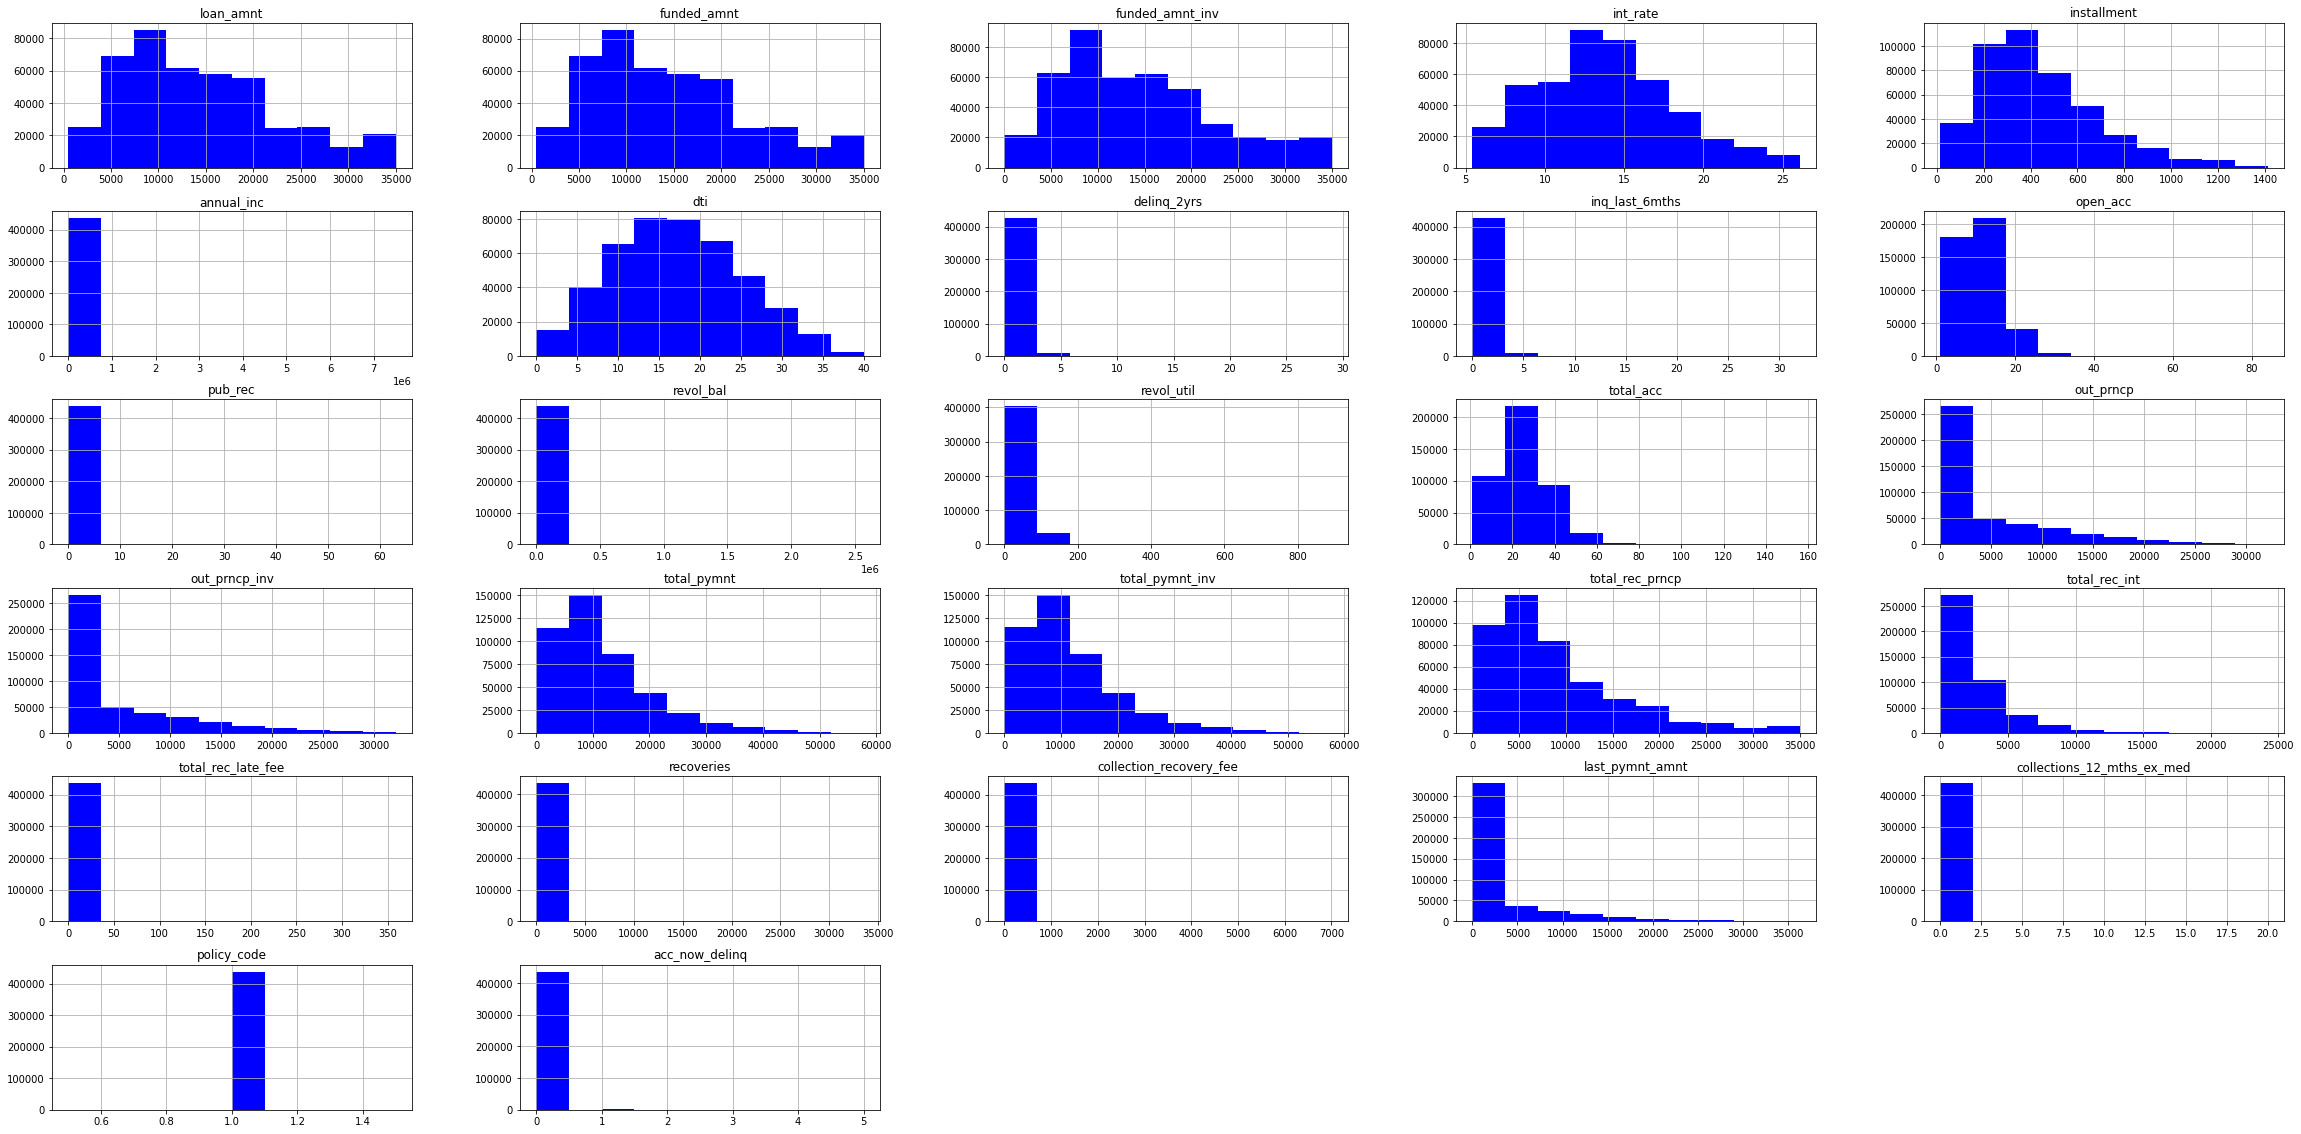

In [17]:
#Check the distribtion of data
df.hist(bins = 10, figsize = (40,20), color = 'b')
plt.show()

In [18]:
#Drop some columns that tend to be only 1 value
df.drop(['acc_now_delinq', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'inq_last_6mths',
         'policy_code', 'pub_rec', 'recoveries', 'total_rec_late_fee'], axis=1, inplace=True)

### Dropping the post approval columns

In [19]:
# Drop the post approval columns, because we will not have that kind of data when the borrower come


# funded_amnt - not useful, funded_amnt_inv is useful which is funded to person
# revol_bal - post/behavioural feature
# out_prncp - post approval feature
# out_prncp_inv - not useful as its for investors
# total_pymnt - post approval feature
# total_pymnt_inv - not useful as it is for investors
# total_rec_prncp - post approval feature
# total_rec_int - post approval feature
# total_rec_late_fee - post approval feature
# last_pymnt_amnt - post approval feature
# tot_cur_bal - post approval feature
# total_rev_hi_lim - post approval feature

df.drop(['funded_amnt', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
         'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'], axis=1, inplace=True)


### Removing Outlier

I use interquartile outler formula to remove outlier

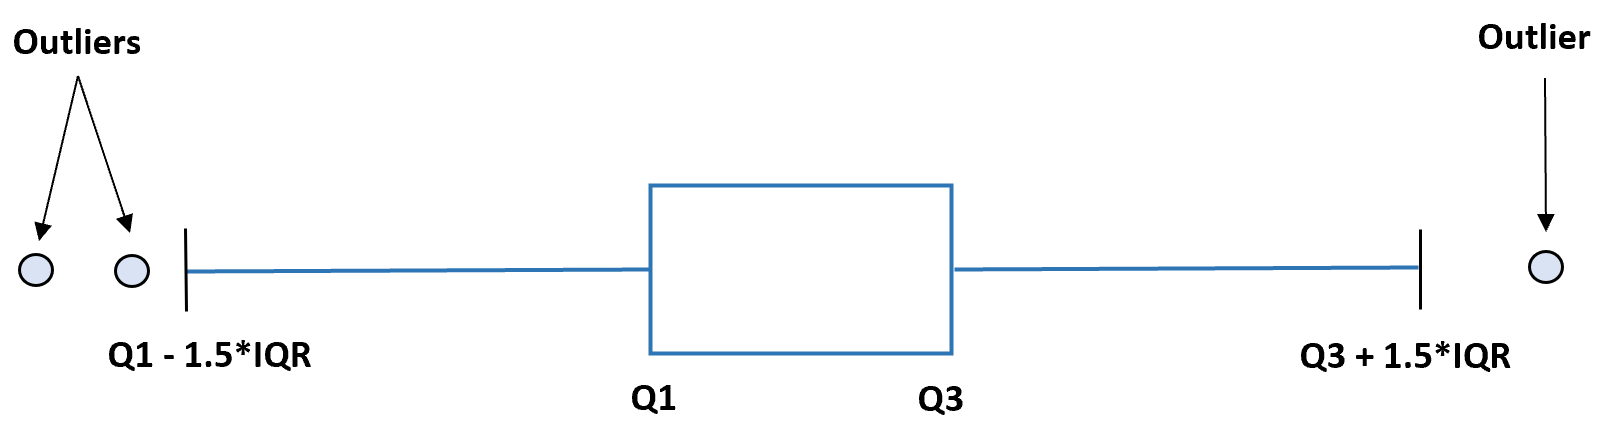

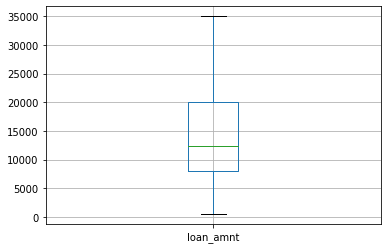

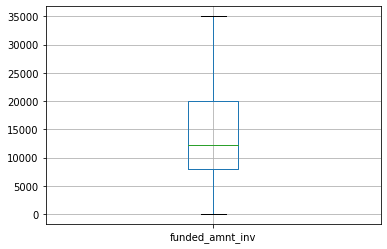

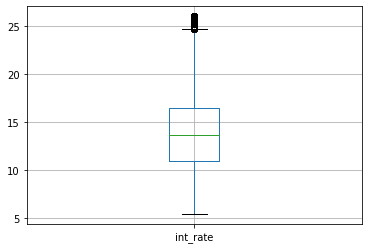

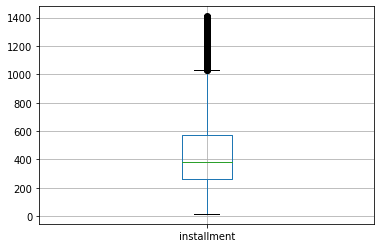

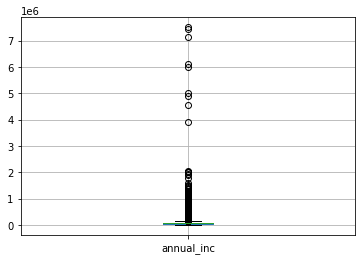

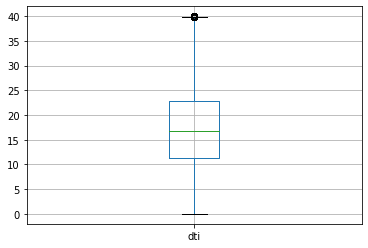

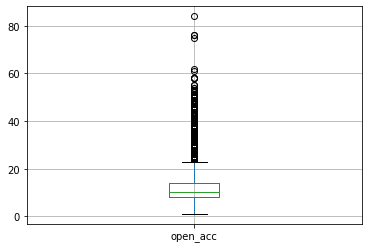

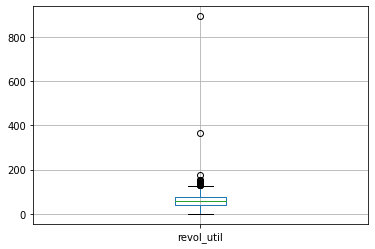

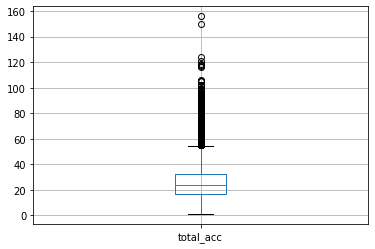

In [20]:
#Check if there is an outlier

for i in df.select_dtypes(include=['int64','float64']).columns:
    ax=df.boxplot(column=i)
    plt.show()


In [21]:
#Drop the outlier

for x in df.select_dtypes(include=['int64','float64']).columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [22]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                4631
installment            10844
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc             17979
verification_status        0
loan_status                0
purpose                    0
title                      0
dti                      110
open_acc               10073
revol_util                17
total_acc               8246
initial_list_status        0
dtype: int64


In [23]:
#Drop the missing value by rows
df.dropna(axis=0, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394132 entries, 1 to 466283
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            394132 non-null  float64
 1   funded_amnt_inv      394132 non-null  float64
 2   term                 394132 non-null  object 
 3   int_rate             394132 non-null  float64
 4   installment          394132 non-null  float64
 5   grade                394132 non-null  object 
 6   sub_grade            394132 non-null  object 
 7   emp_title            394132 non-null  object 
 8   emp_length           394132 non-null  object 
 9   home_ownership       394132 non-null  object 
 10  annual_inc           394132 non-null  float64
 11  verification_status  394132 non-null  object 
 12  loan_status          394132 non-null  object 
 13  purpose              394132 non-null  object 
 14  title                394132 non-null  object 
 15  dti              

The distribution of data seems to be better than before dropping the outlier.

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>]], dtype=object)

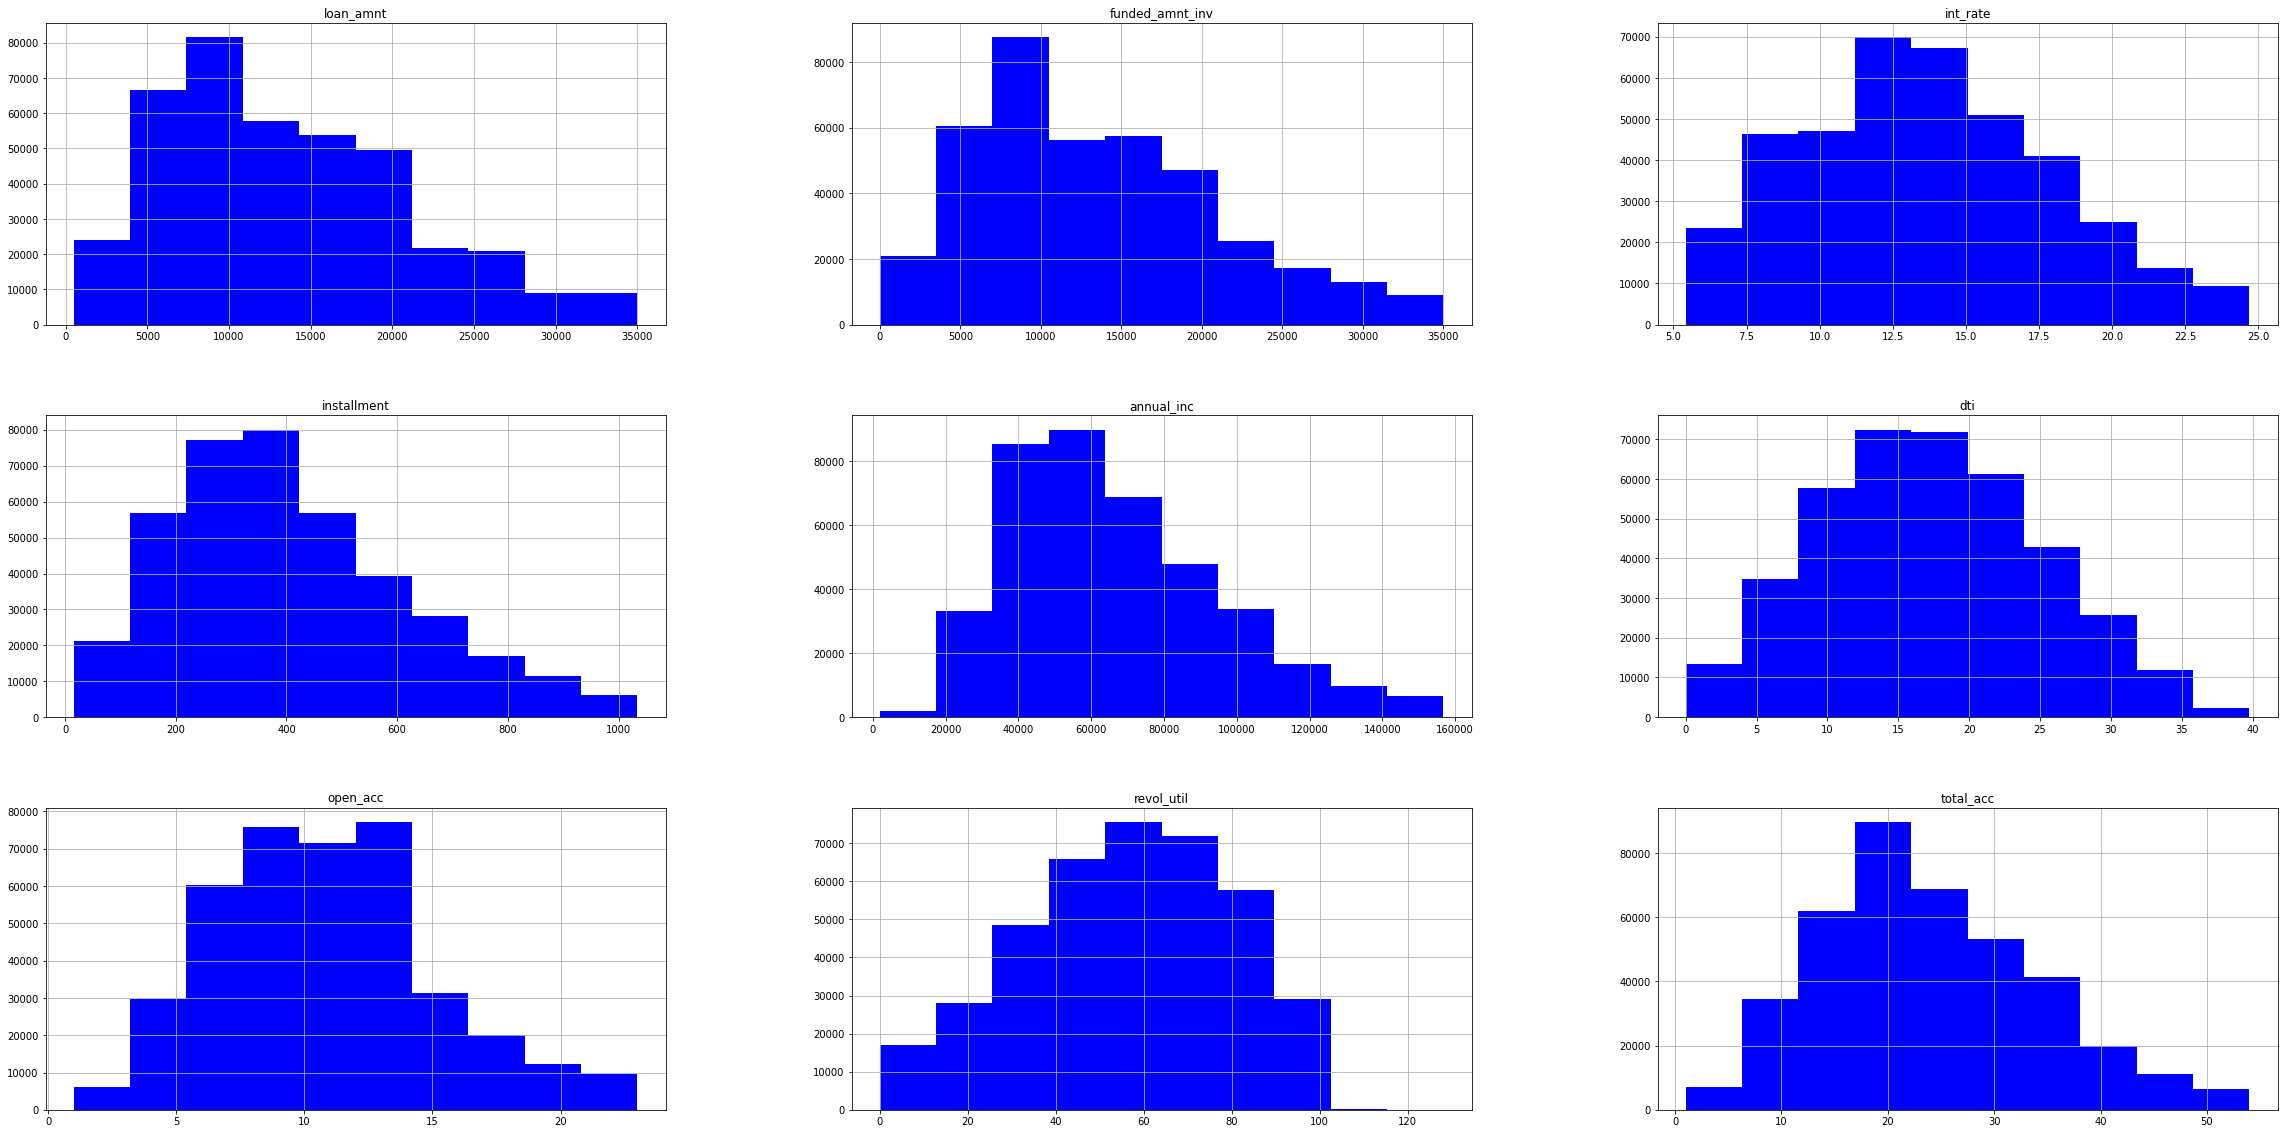

In [25]:
#Visualize the distribution after cleaning data
df.hist(bins = 10, figsize = (40,20), color = 'b')

## Exploratory Data Analysis

As shown below, teachers, managers and registered nurse are the top 3 jobs that apply for the most loans. It can be used for customer market research, promotion, and more.

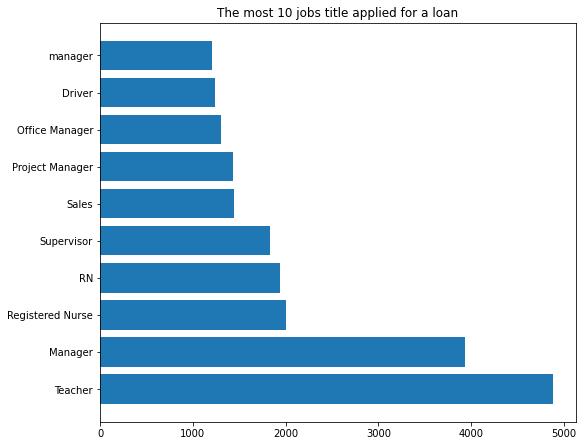

In [26]:
#Visualize the most 10 jobs title applied for a loan

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:10].index, df.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title applied for a loan")
plt.tight_layout()

There, I want to show the data distribution of each column grouped by loan status

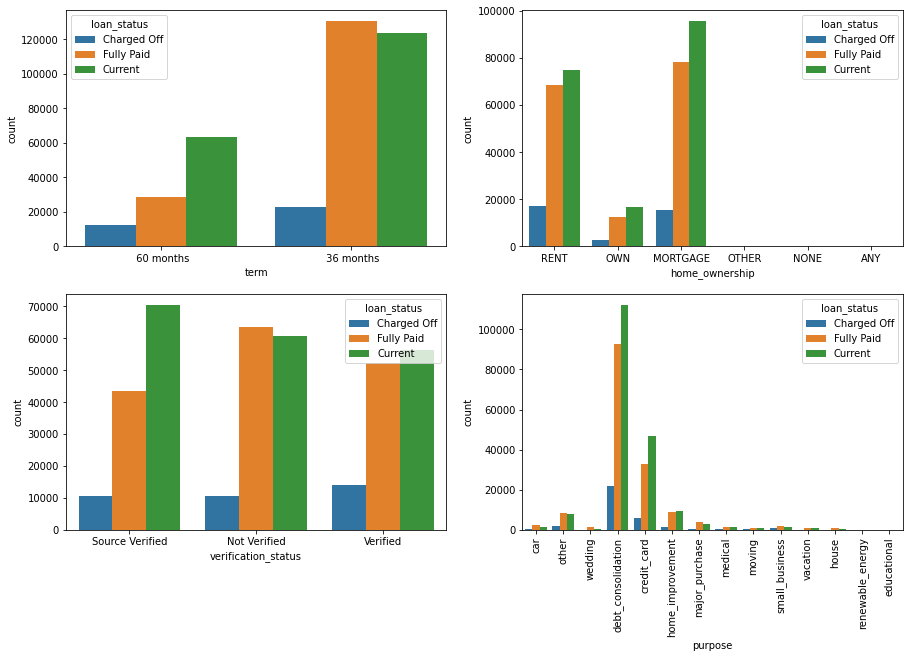

In [27]:
#Check the ditribution of person by loan_status

temp_data = df[df["loan_status"].isin(["Fully Paid","Charged Off","Current"])]

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=temp_data, hue="loan_status")

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=temp_data, hue="loan_status")

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=temp_data, hue="loan_status")

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=temp_data, hue="loan_status")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

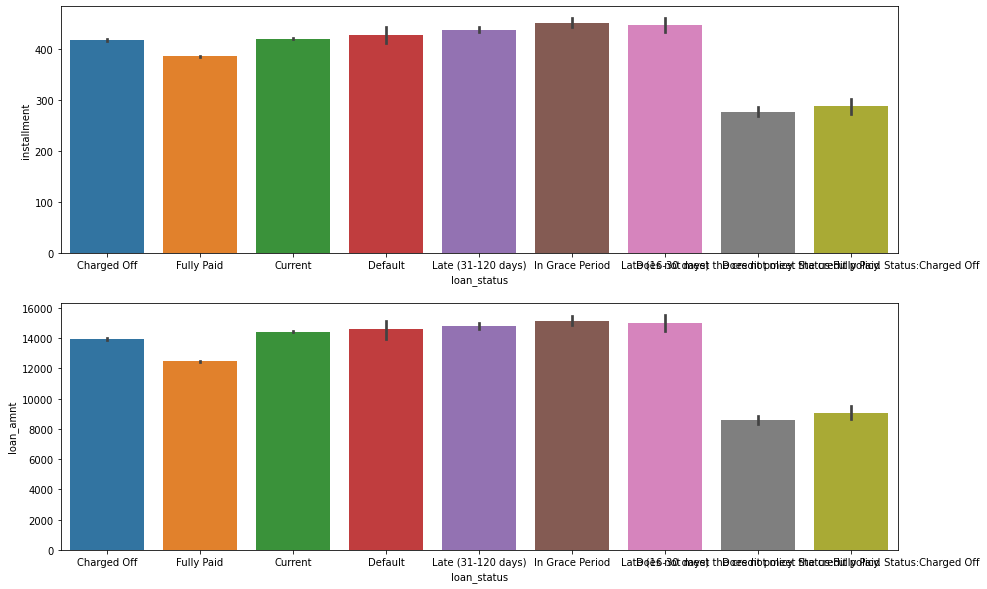

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.barplot(data=df, x='loan_status', y='installment')

plt.subplot(2, 1, 2)
sns.barplot(data=df, x='loan_status', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

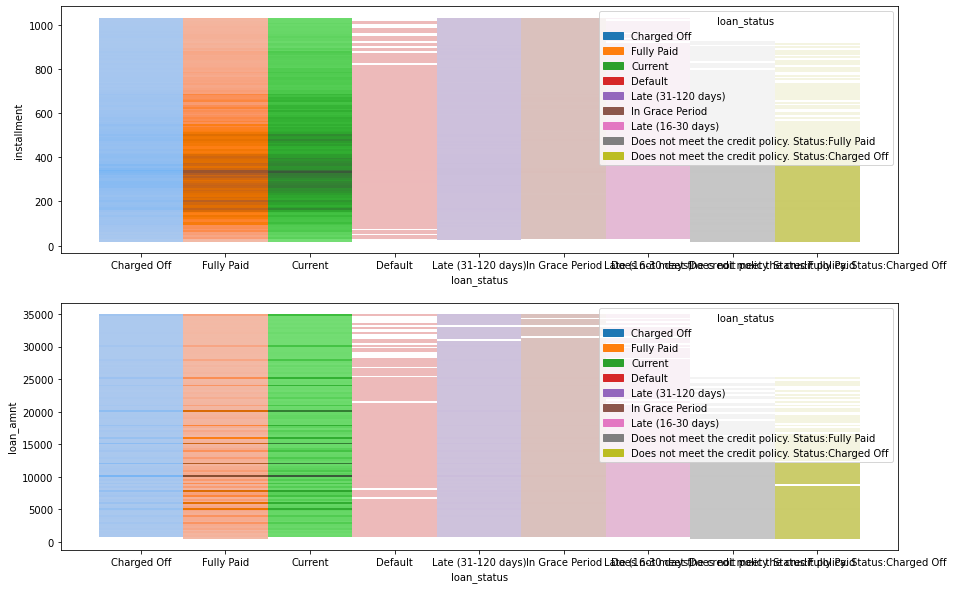

In [29]:
#Visualize the the installment and loan amount by loan status
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.histplot(data=df, x='loan_status', y='installment', hue='loan_status')

plt.subplot(2, 1, 2)
sns.histplot(data=df, x='loan_status', y='loan_amnt',  hue='loan_status')

# installment = df.hvplot.hist(
#     y='installment', by='loan_status', subplots=False, 
#     width=350, height=400, bins=50, alpha=0.4, 
#     title="Installment by Loan Status", 
#     xlabel='Installment', ylabel='Counts', legend='top'
# )

# loan_amnt = df.hvplot.hist(
#     y='loan_amnt', by='loan_status', subplots=False, 
#     width=350, height=400, bins=30, alpha=0.4, 
#     title="Loan Amount by Loan Status", 
#     xlabel='Loan Amount', ylabel='Counts', legend='top'
# )

# fig = installment + loan_amnt
# hvplot.show(fig)

In [30]:
df.drop(['title', 'emp_title'], axis=1, inplace=True)

In [31]:
df['loan_status'].value_counts()

Current                                                187389
Fully Paid                                             159339
Charged Off                                             35193
Late (31-120 days)                                       5658
In Grace Period                                          2610
Does not meet the credit policy. Status:Fully Paid       1662
Late (16-30 days)                                         991
Default                                                   677
Does not meet the credit policy. Status:Charged Off       613
Name: loan_status, dtype: int64

## Feature Engineering

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394132 entries, 1 to 466283
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            394132 non-null  float64
 1   funded_amnt_inv      394132 non-null  float64
 2   term                 394132 non-null  object 
 3   int_rate             394132 non-null  float64
 4   installment          394132 non-null  float64
 5   grade                394132 non-null  object 
 6   sub_grade            394132 non-null  object 
 7   emp_length           394132 non-null  object 
 8   home_ownership       394132 non-null  object 
 9   annual_inc           394132 non-null  float64
 10  verification_status  394132 non-null  object 
 11  loan_status          394132 non-null  object 
 12  purpose              394132 non-null  object 
 13  dti                  394132 non-null  float64
 14  open_acc             394132 non-null  float64
 15  revol_util       

### Change the Ordinal Columns

In [33]:
#Change the ordinal columns
cleaner_app_type = {"term": {" 36 months": 0, " 60 months": 1},
                    "grade": {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6},
                    "sub_grade": {"A1": 0, "A2": 1, "A3": 2, "A4": 3, "A5": 4,
                                  "B1": 10, "B2": 11, "B3": 12, "B4": 13, "B5": 14,
                                  "C1": 20, "C2": 21, "C3": 22, "C4": 23, "C5": 24,
                                  "D1": 30, "D2": 31, "D3": 32, "D4": 33, "D5": 34,
                                  "E1": 40, "E2": 41, "E3": 42, "E4": 43, "E5": 44,
                                  "F1": 50, "F2": 51, "F3": 52, "F4": 53, "F5": 54,
                                  "G1": 60, "G2": 61, "G3": 62, "G4": 63, "G5": 64,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
df = df.replace(cleaner_app_type)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394132 entries, 1 to 466283
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            394132 non-null  float64
 1   funded_amnt_inv      394132 non-null  float64
 2   term                 394132 non-null  int64  
 3   int_rate             394132 non-null  float64
 4   installment          394132 non-null  float64
 5   grade                394132 non-null  int64  
 6   sub_grade            394132 non-null  int64  
 7   emp_length           394132 non-null  float64
 8   home_ownership       394132 non-null  object 
 9   annual_inc           394132 non-null  float64
 10  verification_status  394132 non-null  object 
 11  loan_status          394132 non-null  object 
 12  purpose              394132 non-null  object 
 13  dti                  394132 non-null  float64
 14  open_acc             394132 non-null  float64
 15  revol_util       

### Create new columns for modelling

In [34]:
# Create some new columns to help the model understand the correlation between columns

# percent loan funded by applied loan amount
df['percent_funded'] = df['funded_amnt_inv']/df['loan_amnt']

# percent loan paid regularly
df['percent_regular_payment'] = df['installment']/df['loan_amnt']

# percent loan by annual income
df['percent_loan_by_income'] = df['loan_amnt']/df['annual_inc']

# percent installment by annual income
df['percent_installment_by_income'] = df['installment']/df['annual_inc']

# percent all interest needed to pay
df['percent_all_int_to_pay'] = (((df['loan_amnt']*(1+df['int_rate']/100)**(36/12))-df['loan_amnt'])/df['loan_amnt']).where(df['term']==0,
                                  ((df['loan_amnt']*(1+df['int_rate']/100)**(60/12))-df['loan_amnt'])/df['loan_amnt'])


In [35]:
#Minmax scaler to standardize the loan ammount
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']] = scaler.fit_transform(df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']])

In [36]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
df.dropna(inplace=True)

## Imbalanced Data

In [38]:
#Check the distributions of target data
df['loan_status'].value_counts()

Current                                                187389
Fully Paid                                             159339
Charged Off                                             35193
Late (31-120 days)                                       5658
In Grace Period                                          2610
Does not meet the credit policy. Status:Fully Paid       1662
Late (16-30 days)                                         991
Default                                                   677
Does not meet the credit policy. Status:Charged Off       613
Name: loan_status, dtype: int64

In [39]:
discard = ['Does not meet the credit policy']
df = df[~df.loan_status.str.contains('|'.join(discard))]
df['loan_status'].value_counts()

Current               187389
Fully Paid            159339
Charged Off            35193
Late (31-120 days)      5658
In Grace Period         2610
Late (16-30 days)        991
Default                  677
Name: loan_status, dtype: int64

The target feature for this dataset is an indicator if the loan is good (0) or bad (1). To identify good loans, I use their loan statuses and print their counts below. The description for each status is provided by the Lending Club:

- Current: Loan is up to date on all outstanding payments.
- In Grace Period: Loan is past due but within the 15-day grace period.
- Late (16-30): Loan has not been current for 16 to 30 days.
- Late (31-120): Loan has not been current for 31 to 120 days.
- Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- Default: Loan has not been current for an extended period of time.
- Charged Off: Loan for which there is no longer a reasonable expectation of further payments.

In [40]:
#Change the target data based on the description
equiv = {'Current':0, 'Fully Paid':0, 'Charged Off':1, 'Default':1, 'Late (16-30 days)':1, 'Late (31-120 days)':1}
df['target'] = df['loan_status'].map(equiv)

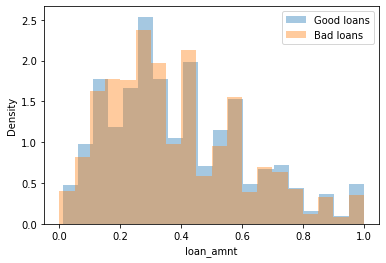

In [41]:
#Visualize the distributions of data by the target data

good = df.loc[df['target'] == 1, 'loan_amnt']
bad = df.loc[df['target'] == 0, 'loan_amnt']

bins = 20
sns.distplot(good, bins=bins, label='Good loans', kde=False, norm_hist=True)
ax = sns.distplot(bad, bins=bins, label='Bad loans', kde=False, norm_hist=True)
ax.set_ylabel('Density')
ax.legend();

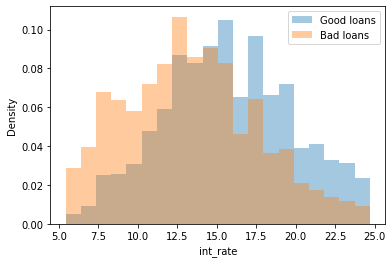

In [42]:
#Visualize the distributions of data by the target data

good = df.loc[df['target'] == 1, 'int_rate']
bad = df.loc[df['target'] == 0, 'int_rate']

bins = 20
sns.distplot(good, bins=bins, label='Good loans', kde=False, norm_hist=True)
ax = sns.distplot(bad, bins=bins, label='Bad loans', kde=False, norm_hist=True)
ax.set_ylabel('Density')
ax.legend();

<Axes: ylabel='target'>

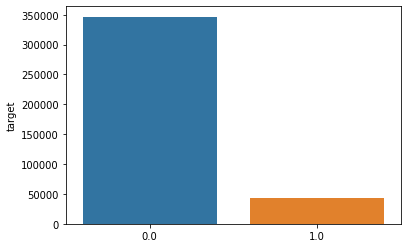

In [43]:
#Visualize the distributions target data
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts())

In [44]:
#Clean overall data
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [45]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [46]:
X = df.drop(['loan_status', 'target'], axis=1)
y = df['target']

In [47]:
X = pd.get_dummies(X, drop_first=True)

In [48]:
X.drop('index', axis=1, inplace=True)

In [49]:
X = clean_dataset(X)

In [50]:
#Apply SMOTE and RandomUnderSampler for the imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [51]:
X, y = pipeline.fit_resample(X, y)

In [52]:
y.value_counts()

0.0    138690
1.0     69345
Name: target, dtype: int64

In [53]:
#Rounding the value because SMOTE and RandomUnderSampler can't take integer value as argument
X[['term', 'grade', 'sub_grade', 'emp_length']] = X[['term', 'grade', 'sub_grade', 'emp_length']].round(0)

## Modelling the Credit Risk Data

There, I will use 3 models to predict the loan status

In [54]:
X

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,open_acc,revol_util,total_acc,percent_funded,percent_regular_payment,percent_loan_by_income,percent_installment_by_income,percent_all_int_to_pay,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0.275362,0.285714,0.0,6.030000,0.283469,0.0,0.0,10.0,0.827257,24.620000,18.000000,26.100000,38.000000,1.000000,0.030436,0.076923,0.002341,0.192028,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.623188,0.628571,0.0,18.750000,0.773738,3.0,32.0,6.0,0.310641,27.620000,9.000000,86.900000,12.000000,1.000000,0.036530,0.440000,0.016073,0.674561,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.449275,0.457143,0.0,6.990000,0.469649,0.0,2.0,7.0,0.433337,13.900000,17.000000,35.000000,45.000000,1.000000,0.030873,0.231884,0.007159,0.224700,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.217391,0.228571,0.0,7.900000,0.230416,0.0,3.0,2.0,0.617382,16.580000,10.000000,73.200000,31.000000,1.000000,0.031291,0.082051,0.002567,0.256216,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.217391,0.227143,0.0,10.990000,0.241757,1.0,11.0,4.0,0.317744,13.740000,17.000000,46.400000,42.000000,0.993750,0.032735,0.156556,0.005125,0.367261,1.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208030,0.570399,0.576536,1.0,12.761200,0.511861,1.0,13.0,10.0,0.424526,19.560675,10.714999,42.314500,14.642500,1.000000,0.026550,0.306053,0.008395,0.690226,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
208031,0.736990,0.740099,1.0,22.886988,0.699569,4.0,43.0,10.0,0.420333,13.418079,16.536931,33.609261,47.907386,0.999093,0.028127,0.393564,0.011081,1.803208,0.092614,0.0,0.0,0.0,0.907386,0.000000,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
208032,0.291190,0.301316,0.0,18.643430,0.362054,3.0,33.0,9.0,0.663791,13.654173,10.467148,94.525559,20.000000,1.000000,0.036477,0.094959,0.003463,0.670060,0.532852,0.0,0.0,0.0,0.467148,0.532852,0.0,0.000000,0.467148,0.0,0.0,0.0,0.0,0.532852,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
208033,0.188136,0.199734,0.0,13.350000,0.157176,2.0,21.0,0.0,0.575451,11.980014,9.671767,96.880947,12.328233,1.000000,0.030278,0.061795,0.001637,0.592497,0.328233,0.0,0.0,0.0,0.671767,0.328233,0.0,0.328233,0.671767,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.328233


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training and testing data

In [56]:
#Try 3 different models
dtc =DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [57]:
models = [dtc, rfc, xgb]

This is model performance of DecisionTreeClassifier()


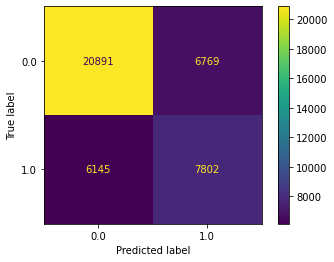

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76     27660
         1.0       0.54      0.56      0.55     13947

    accuracy                           0.69     41607
   macro avg       0.65      0.66      0.66     41607
weighted avg       0.69      0.69      0.69     41607

--------------------------------------------------------------------------------------
This is model performance of RandomForestClassifier()


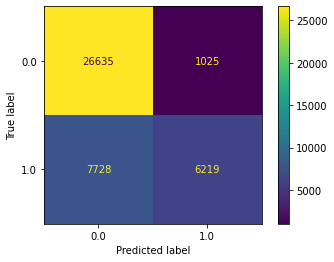

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     27660
         1.0       0.86      0.45      0.59     13947

    accuracy                           0.79     41607
   macro avg       0.82      0.70      0.72     41607
weighted avg       0.80      0.79      0.77     41607

--------------------------------------------------------------------------------------
This is model performance of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
     

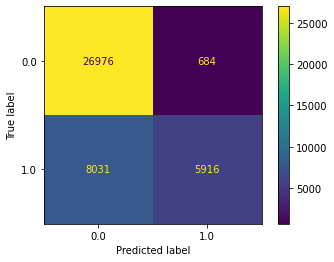

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86     27660
         1.0       0.90      0.42      0.58     13947

    accuracy                           0.79     41607
   macro avg       0.83      0.70      0.72     41607
weighted avg       0.81      0.79      0.77     41607

--------------------------------------------------------------------------------------


In [58]:
#The result and performance of 3 different models
model_fitted = []

for i in models:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    
    print ("This is model performance of {0}".format(i))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------------------------')
    
    model_fitted.append(model)

In [59]:
model_fitted

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

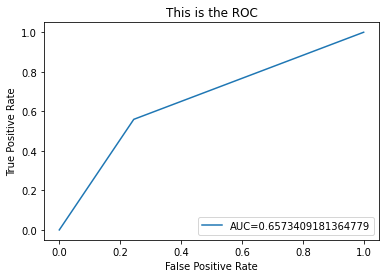

----------------------------------------------------------------------------------------


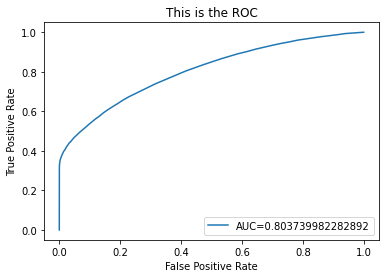

----------------------------------------------------------------------------------------


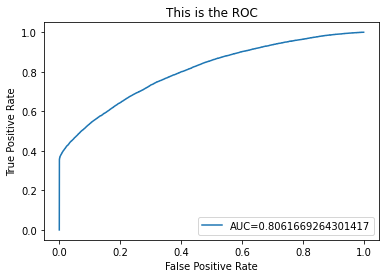

----------------------------------------------------------------------------------------


In [60]:
#Visualize the ROC-AUC curve for every models
for i in model_fitted:
    #define metrics
    y_pred_proba = i.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.title("This is the ROC")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    print('----------------------------------------------------------------------------------------')

### Feature importance of the models

This is the feature importance of DecisionTreeClassifier() model


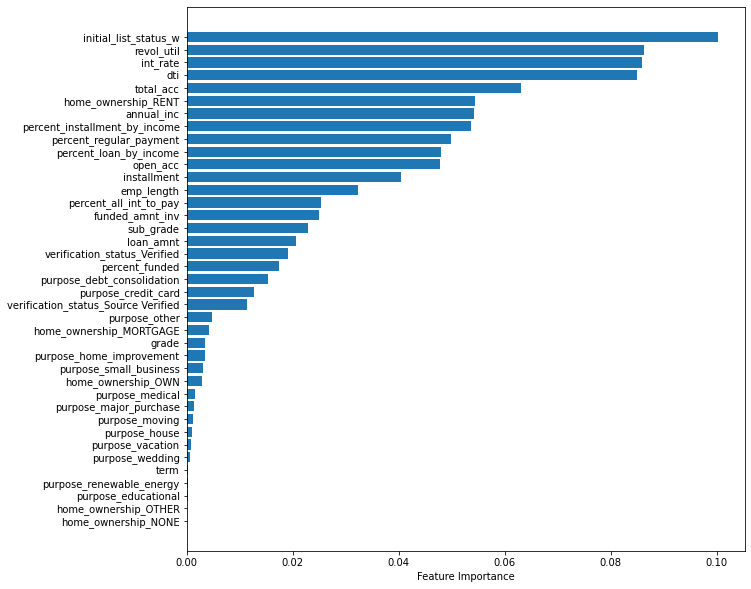

--------------------------------------------------------------------------------------
This is the feature importance of RandomForestClassifier() model


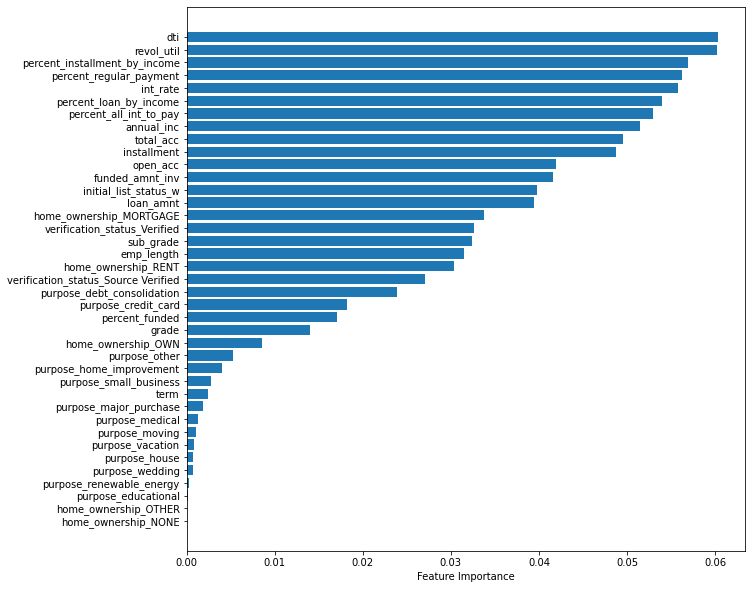

--------------------------------------------------------------------------------------
This is the feature importance of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model


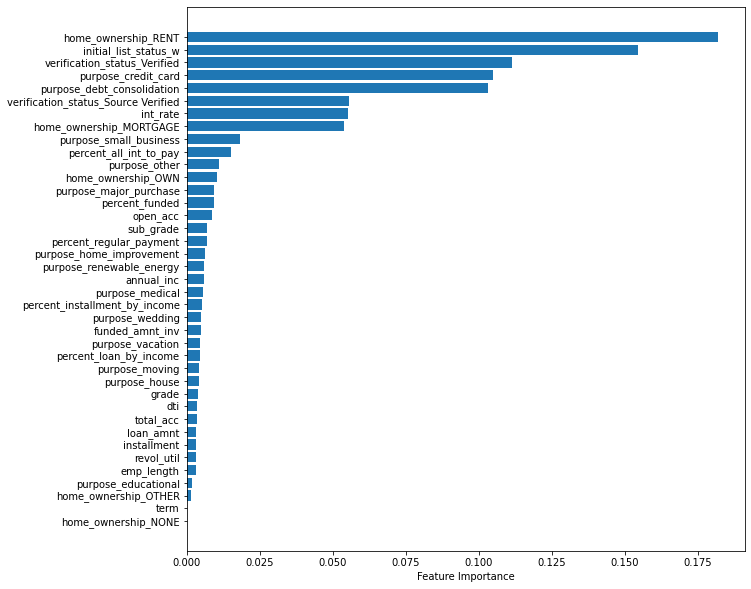

--------------------------------------------------------------------------------------


In [61]:
#Check the feature importance
for i in model_fitted:
    print ("This is the feature importance of {0} model".format(i))
    sorted_idx = i.feature_importances_.argsort()
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.barh(X.columns[sorted_idx], i.feature_importances_[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.show()
    print('--------------------------------------------------------------------------------------')

In [62]:
def common_member(a, b):
    result = [i for i in a if i in b]
    return result

In [63]:
sorted_idx_dtc = models[0].feature_importances_.argsort()
sorted_idx_rfc = models[1].feature_importances_.argsort()
sorted_idx_xgb = models[2].feature_importances_.argsort()

dtc_cols = list(X.columns[sorted_idx_dtc])
rfc_cols = list(X.columns[sorted_idx_rfc])
xgb_cols = list(X.columns[sorted_idx_xgb])

In [64]:
#Get the same important columns based on top 15 important features for every model 
cols_1 = common_member(dtc_cols[-15:], rfc_cols[-15:])
cols_all = common_member(cols_1, xgb_cols[-15:])

In [65]:
#The result of important feature based on 3 different models
cols_all

['percent_all_int_to_pay', 'open_acc', 'int_rate', 'initial_list_status_w']

We get 5 common important features from top 15 important features for each models. We get 2 important features we create from feature engineering, percent_all_int_to_pay and percent_regular_payment. It means the feature engineering can help models to predict the loan status.

In [66]:
X['target'] = y
X['target'].value_counts()

0.0    138690
1.0     69345
Name: target, dtype: int64

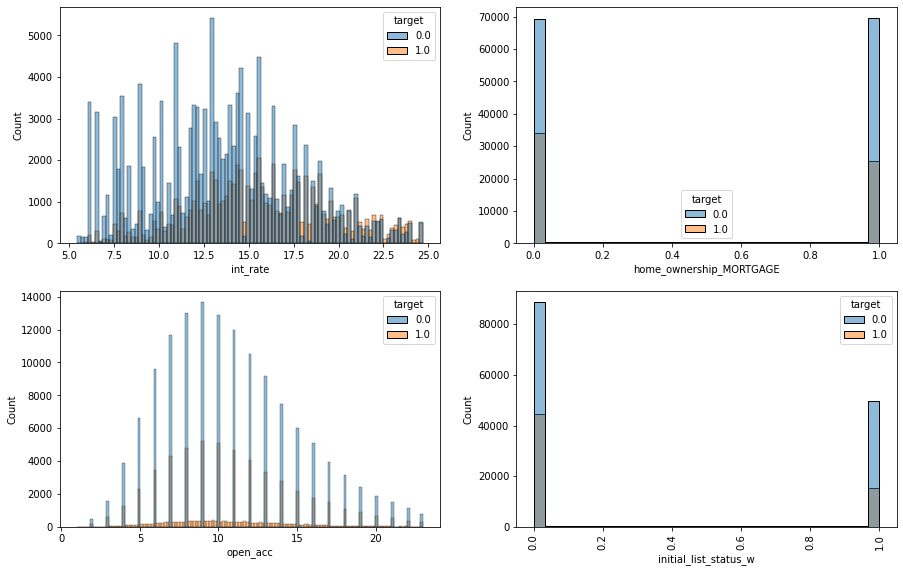

In [67]:
#Check the distribution based on the important features
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(x='int_rate', data=X, hue="target")

plt.subplot(4, 2, 2)
sns.histplot(x='home_ownership_MORTGAGE', data=X, hue="target")

plt.subplot(4, 2, 3)
sns.histplot(x='open_acc', data=X, hue="target")

plt.subplot(4, 2, 4)
g = sns.histplot(x='initial_list_status_w', data=X, hue="target")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

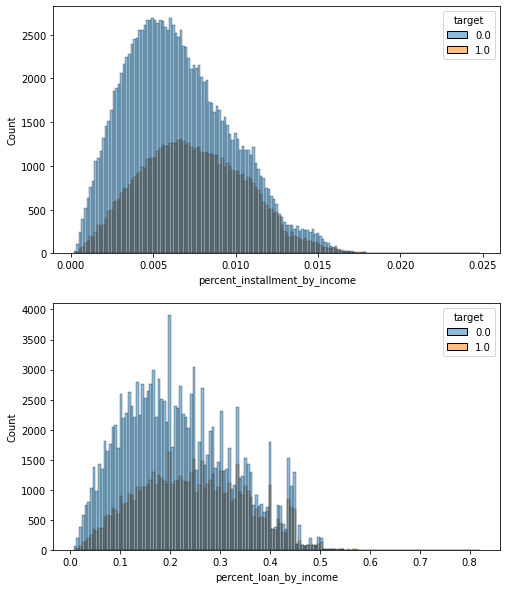

In [68]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
sns.histplot(x='percent_installment_by_income', data=X, hue="target")

plt.subplot(2, 1, 2)
sns.histplot(x='percent_loan_by_income', data=X, hue="target")

g.set_xticklabels(g.get_xticklabels(), rotation=90);

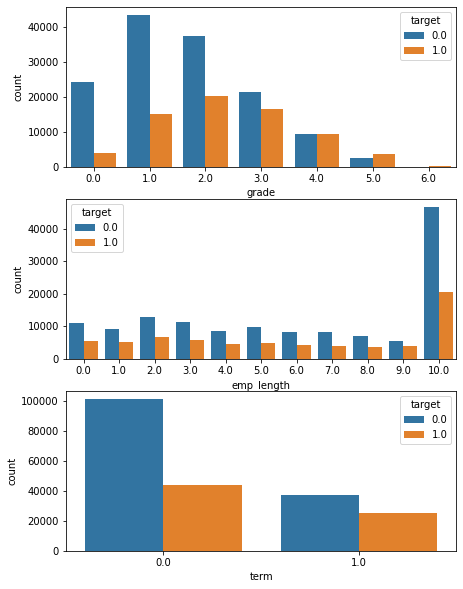

In [69]:
plt.figure(figsize=(7, 10))

plt.subplot(3, 1, 1)
sns.countplot(x='grade', data=X, hue="target")

plt.subplot(3, 1, 2)
sns.countplot(x='emp_length', data=X, hue="target")

plt.subplot(3, 1, 3)
sns.countplot(x='term', data=X, hue="target")

g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [70]:
#Save the best model
import pickle

filename = 'finalized_model_xgboost.sav'
pickle.dump(model_fitted[2], open(filename, 'wb'))

In [71]:
X_test

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,open_acc,revol_util,total_acc,percent_funded,percent_regular_payment,percent_loan_by_income,percent_installment_by_income,percent_all_int_to_pay,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
56039,0.350725,0.360000,0.0,7.690000,0.370545,0.0,3.0,10.0,0.601237,26.540000,7.000000,50.60000,26.000000,1.000000,0.031194,0.132632,0.004137,0.248896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
92272,0.710145,0.713571,1.0,19.360000,0.626274,5.0,53.0,7.0,0.581864,19.980000,16.000000,35.80000,35.000000,0.999000,0.026139,0.271739,0.007103,1.422669,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
78421,0.313768,0.323571,0.0,11.710000,0.352428,1.0,12.0,4.0,0.149199,14.640000,11.000000,41.50000,16.000000,1.000000,0.033076,0.453000,0.014984,0.394043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
29881,0.513768,0.520714,0.0,7.900000,0.544569,0.0,3.0,10.0,0.310641,15.940000,12.000000,39.50000,41.000000,1.000000,0.031291,0.364500,0.011405,0.256216,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
163258,1.000000,0.998571,1.0,23.330000,0.959967,5.0,54.0,4.0,0.536660,20.800000,11.000000,90.80000,17.000000,0.998571,0.028381,0.411765,0.011686,1.853275,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113896,0.304348,0.314286,0.0,10.160000,0.333949,1.0,10.0,6.0,0.504372,16.520000,8.000000,55.90000,18.000000,1.000000,0.032343,0.137500,0.004447,0.336816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
87970,0.449275,0.457143,0.0,12.990000,0.513894,2.0,20.0,10.0,0.407506,14.640000,8.000000,44.60000,24.000000,1.000000,0.033689,0.246154,0.008293,0.442514,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
191324,0.484871,0.492230,1.0,22.452276,0.501352,4.0,43.0,2.0,0.382923,22.828458,12.186552,49.03731,23.186552,1.000000,0.029866,0.295718,0.008697,1.607219,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.813448
110315,0.274638,0.285000,0.0,7.620000,0.289831,0.0,2.0,7.0,0.310641,2.450000,5.000000,1.70000,23.000000,1.000000,0.031162,0.199500,0.006217,0.246462,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000


## Applying Credit Risk Model

There, I want to apply the model I built before to test data. I want to calculate the threshold of safe loan acceptance for the model using quantile.

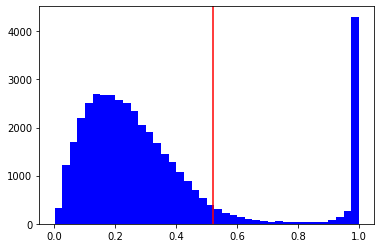

In [72]:
clf_xgboost_preds = model_fitted[2].predict_proba(X_test)[::,1]

# Plot the predicted probabilities of default
plt.hist(clf_xgboost_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_xgboost_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

In [73]:
test_pred_df = X_test.copy()
test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']] = scaler.inverse_transform(test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']])
test_pred_df['prob_default'] = clf_xgboost_preds
test_pred_df['true_loan_status'] = y_test.values
test_pred_df['term (year)'] = test_pred_df['term'].apply(lambda x: 3 if x == 0 else 6)

This is how I would calculate the expected loss. Basically, LGD or loss given default will not be 100% because credit borrowers can usually repay a certain amount of the loan until it becomes default. Assuming 100% can give you the worst result of loan it can be.

In [74]:
# Expected Loss
# Loss = PD * EAD * LGD
# PD = Probability of Default
# EAD = Exposure of Default
# LGD = Loss Given Default (Assume 100% for each loss)

threshold = np.quantile(clf_xgboost_preds, threshold)
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold else 0)

overall_expected_loss = np.sum(test_pred_df[test_pred_df['pred_loan_status']==0]['prob_default'] * test_pred_df[test_pred_df['pred_loan_status']==0]['loan_amnt'] * 1)
overall_expected_loss

43280356.575137556

In [75]:
# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
accepted_loans['estimated_profit'] = accepted_loans[accepted_loans['true_loan_status']==0]['loan_amnt'] * ((1+accepted_loans[accepted_loans['true_loan_status']==0]['int_rate']/100)**accepted_loans[accepted_loans['true_loan_status']==0]['term (year)']) - accepted_loans[accepted_loans['true_loan_status']==0]['loan_amnt']

# Calculate the present value of estimated profit
accepted_loans['pv_estimated_profit'] = accepted_loans[accepted_loans['true_loan_status']==0]['estimated_profit']/((1+accepted_loans[accepted_loans['true_loan_status']==0]['int_rate']/100)**accepted_loans[accepted_loans['true_loan_status']==0]['term (year)'])

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

0.15554329840044126


### Calculating the threshold, profit, and irr by acceptance rate

In [76]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds = []
bad_rates = []
loan_loss_count = []
avg_loss = []
expected_loss = []
pv_estimated_net_profit = []
estimated_net_profit = []
estimated_irr = []

for rate in accept_rates:
    test_pred_df = X_test.copy()
    test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']] = scaler.inverse_transform(test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']])
    test_pred_df['prob_default'] = clf_xgboost_preds
    test_pred_df['true_loan_status'] = y_test.values
    test_pred_df['term (year)'] = test_pred_df['term'].apply(lambda x: 3 if x == 0 else 6)
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(test_pred_df['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0].copy()
    # Create a column to calculate estimated profit for each successfull loan
    accepted_loans['estimated_profit'] = accepted_loans[accepted_loans['true_loan_status']==0]['loan_amnt'] * ((1+accepted_loans[accepted_loans['true_loan_status']==0]['int_rate']/100)**accepted_loans[accepted_loans['true_loan_status']==0]['term (year)']) - accepted_loans[accepted_loans['true_loan_status']==0]['loan_amnt']
    # Create a column to calculate the present value of estimated profit
    accepted_loans['pv_estimated_profit'] = accepted_loans[accepted_loans['true_loan_status']==0]['estimated_profit']/((1+accepted_loans[accepted_loans['true_loan_status']==0]['int_rate']/100)**accepted_loans[accepted_loans['true_loan_status']==0]['term (year)'])
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))
    # Calculate wrong predict loans count
    loan_loss_count.append(np.sum(accepted_loans['true_loan_status']))
    # Calculate average loss per loan
    avg_loss.append(np.mean(accepted_loans[accepted_loans['true_loan_status']==1]['loan_amnt']))
    # Calculate and append total expected loss using the acceptance rate
    expected_loss.append(np.sum(accepted_loans[accepted_loans['true_loan_status']==1]['loan_amnt']))
    # Calculate and append present value of estimated profit
    pv_estimated_net_profit.append(np.sum(accepted_loans[accepted_loans['true_loan_status']==0]['pv_estimated_profit']) - np.sum(accepted_loans[accepted_loans['true_loan_status']==1]['loan_amnt']))
    # Calculate and append total estimated profit using the acceptance rate
    estimated_net_profit.append(np.sum(accepted_loans[accepted_loans['true_loan_status']==0]['estimated_profit']) - np.sum(accepted_loans[accepted_loans['true_loan_status']==1]['loan_amnt']))
    # Calculate and append estimated ROI
    estimated_irr.append((np.sum(accepted_loans[accepted_loans['true_loan_status']==0]['pv_estimated_profit']) - np.sum(accepted_loans[accepted_loans['true_loan_status']==1]['loan_amnt']))*100/np.sum(accepted_loans['loan_amnt']))

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, loan_loss_count, avg_loss, expected_loss, pv_estimated_net_profit, estimated_net_profit, estimated_irr),
                        columns = ['Acceptance Rate','Threshold','Bad Rate', 'Loss Count', 'Average Loss', 'Expected Loss', 'PV Estimated Net Profit', 'Estimated Net Profit', 'Estimated IRR'])

# Print the entire table
strat_df

,Acceptance Rate,Threshold,Bad Rate,Loss Count,Average Loss,Expected Loss,PV Estimated Net Profit,Estimated Net Profit,Estimated IRR
0,1.00,1.000,0.335,13947.0,14185.396686,1.978437e+08,-4.663008e+07,1.197546e+08,-8.133560
1,0.95,1.000,0.335,13947.0,14185.396686,1.978437e+08,-4.663008e+07,1.197546e+08,-8.133560
2,0.90,0.982,0.261,9789.0,14139.046208,1.384071e+08,1.280653e+07,1.791912e+08,2.492182
3,0.85,0.523,0.232,8216.0,13822.172500,1.135630e+08,3.222445e+07,1.882158e+08,6.714785
4,0.80,0.437,0.218,7274.0,13544.697107,9.852413e+07,3.739269e+07,1.763824e+08,8.358790
5,0.75,0.389,0.205,6404.0,13351.469884,8.550281e+07,4.063852e+07,1.640028e+08,9.763263
6,0.70,0.352,0.195,5670.0,13229.550388,7.501155e+07,4.151681e+07,1.506148e+08,10.722944
7,0.65,0.321,0.183,4947.0,13178.927101,6.519615e+07,4.203206e+07,1.383496e+08,11.713214
8,0.60,0.295,0.172,4293.0,13154.550328,5.647248e+07,4.179210e+07,1.267299e+08,12.611486
9,0.55,0.270,0.161,3677.0,13189.805000,4.849891e+07,4.067134e+07,1.147895e+08,13.397468


In [77]:
strat_df[['Acceptance Rate', 'Threshold', 'Bad Rate', 'Expected Loss', 'PV Estimated Net Profit']]

,Acceptance Rate,Threshold,Bad Rate,Expected Loss,PV Estimated Net Profit
0,1.00,1.000,0.335,1.978437e+08,-4.663008e+07
1,0.95,1.000,0.335,1.978437e+08,-4.663008e+07
2,0.90,0.982,0.261,1.384071e+08,1.280653e+07
3,0.85,0.523,0.232,1.135630e+08,3.222445e+07
4,0.80,0.437,0.218,9.852413e+07,3.739269e+07
5,0.75,0.389,0.205,8.550281e+07,4.063852e+07
6,0.70,0.352,0.195,7.501155e+07,4.151681e+07
7,0.65,0.321,0.183,6.519615e+07,4.203206e+07
8,0.60,0.295,0.172,5.647248e+07,4.179210e+07
9,0.55,0.270,0.161,4.849891e+07,4.067134e+07


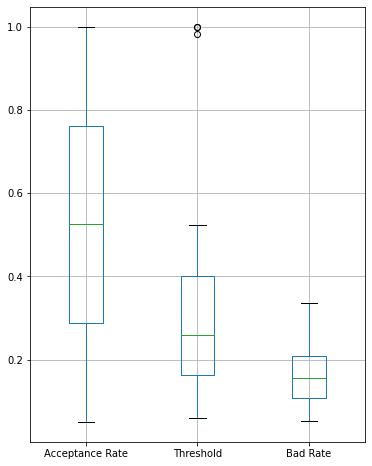

In [78]:
plt.figure(figsize=(6,8))
strat_df[['Acceptance Rate','Threshold','Bad Rate']].boxplot()
plt.show()

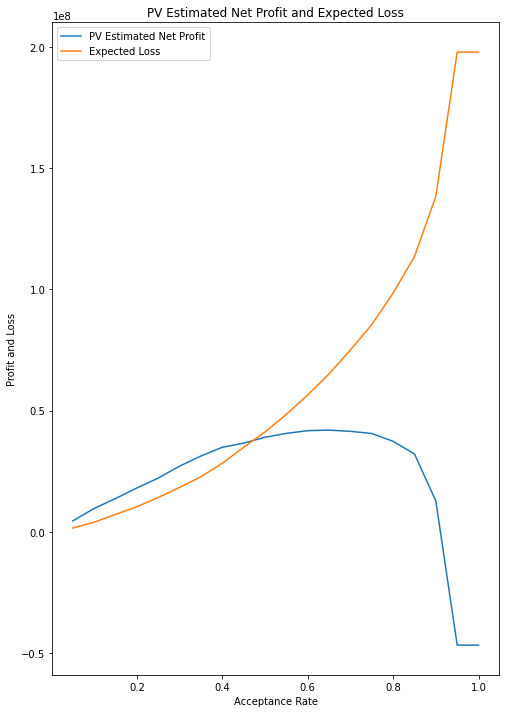

In [79]:
# Plot the strategy curve
plt.figure(figsize=(8,12))
plt.plot(strat_df['Acceptance Rate'], strat_df['PV Estimated Net Profit'])
plt.plot(strat_df['Acceptance Rate'], strat_df['Expected Loss'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Profit and Loss')
plt.title('PV Estimated Net Profit and Expected Loss')
plt.legend(['PV Estimated Net Profit', 'Expected Loss'])
plt.show()



### Choosing the best acceptance rate

In [80]:
strat_df.loc[strat_df['PV Estimated Net Profit'] == np.max(strat_df['PV Estimated Net Profit'])]

,Acceptance Rate,Threshold,Bad Rate,Loss Count,Average Loss,Expected Loss,PV Estimated Net Profit,Estimated Net Profit,Estimated IRR
7,0.65,0.321,0.183,4947.0,13178.927101,6.519615e+07,4.203206e+07,1.383496e+08,11.713214


In [81]:
threshold = np.quantile(clf_xgboost_preds, 0.65)

test_pred_df = X_test.copy()
test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']] = scaler.inverse_transform(test_pred_df[['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']])
test_pred_df['prob_default'] = clf_xgboost_preds
test_pred_df['true_loan_status'] = y_test.values
test_pred_df['term (year)'] = test_pred_df['term'].apply(lambda x: 3 if x == 0 else 6)

test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold else 0)

overall_expected_loss = np.sum(test_pred_df[test_pred_df['pred_loan_status']==0]['prob_default'] * test_pred_df[test_pred_df['pred_loan_status']==0]['loan_amnt'] * 1)
overall_expected_loss

63373585.7007695

In [82]:
# Difference loss between the overall expected loss and the test case expected loss
diff_loss = strat_df.loc[strat_df['PV Estimated Net Profit'] == np.max(strat_df['PV Estimated Net Profit'])]['Expected Loss'] - overall_expected_loss
print("The difference loss between the expected loss and the tested loss is", round(diff_loss.values[0],0))
print("It is about " + str(round(diff_loss.values[0]*100/overall_expected_loss,2)) + "% higher than the expected value")
print("The value is positive, it means the tested loss is higher than expected loss, is it understandable? If you still can admit the error level between the loss from modelling and testing, then you can use the threshold to give the loan")

The difference loss between the expected loss and the tested loss is 1822567.0
It is about 2.88% higher than the expected value
The value is positive, it means the tested loss is higher than expected loss, is it understandable? If you still can admit the error level between the loss from modelling and testing, then you can use the threshold to give the loan


## Conclusion

We have done modelling for credit risk scoring. The model we use is XGBoost. Then, we applied it to get the optimum acceptance rate based on the profit we can get. We get the optimum acceptance rate = 0.65. The estimated net present profit is 42.032,060 with IRR 11.7 %. Is it worth? You can consider more by comparing with interest in finance industries, such as bank.